<a href="https://colab.research.google.com/github/onenechan/BSch3v_library/blob/master/JAXAday1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HEALpixに慣れようということで練習用

https://qiita.com/github-nakasho/items/6d2e06a3caca1f00f58a 

を参考にしています。
ドキュメント: https://healpy.readthedocs.io/en/latest/tutorial.html

In [ ]:
pip install healpy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


0.0 180.0 -180.0 180.0


全体の画素数は12288
[1.46197116 1.46197116 1.46197116 1.46197116 2.92418036]
[ 45.  135.  225.  315.   22.5]


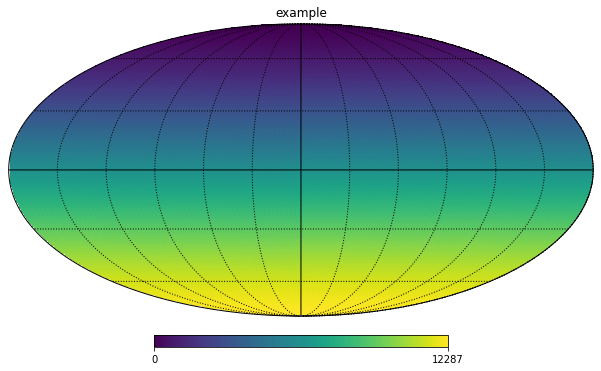

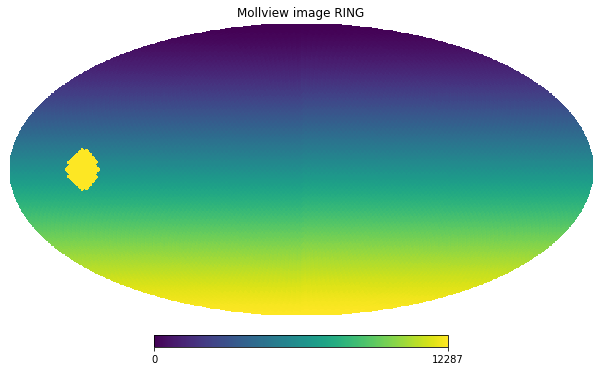

In [ ]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt 


# define nside
nside = 32

# make healpix map
m = np.arange(hp.nside2npix(nside))
hp.mollview(m, title='example')

# 画素数の表示
npix = hp.nside2npix(nside)
print("全体の画素数は%d" % npix)

# make grid line
hp.graticule()

# ベクトルを用いて座標を表現する
# 例えばvecはpi/2と3pi/4を正規化ベクトル
vec = hp.ang2vec(np.pi / 2, np.pi * 3 / 4)
pix_disc = hp.query_disc(nside=32, vec=vec, radius=np.radians(10))

# その点から10度以内のすべての画素のインデックスを求めてマップの色を変更
m = np.arange(npix)
m[pix_disc] = m.max()
hp.mollview(m, title="Mollview image RING")

# pix2angを使って各ピクセルの北緯と経度を取得することができる
theta, phi = np.degrees(hp.pix2ang(nside=32, ipix=[0, 1, 2, 3, 4]))
print(theta)
print(phi)

# Draw
plt.show()

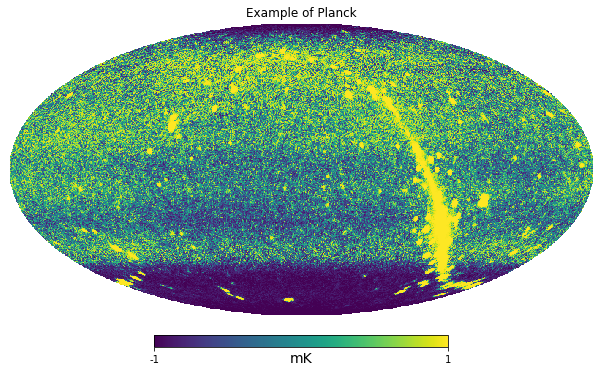

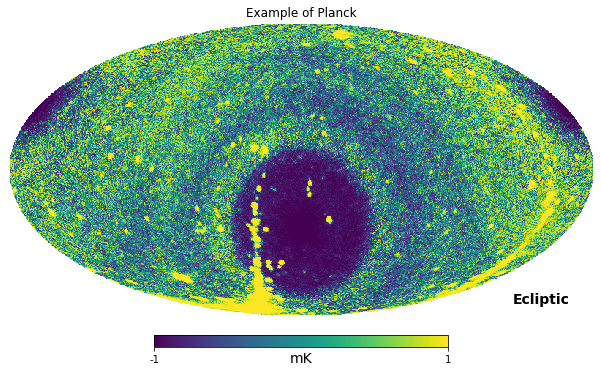

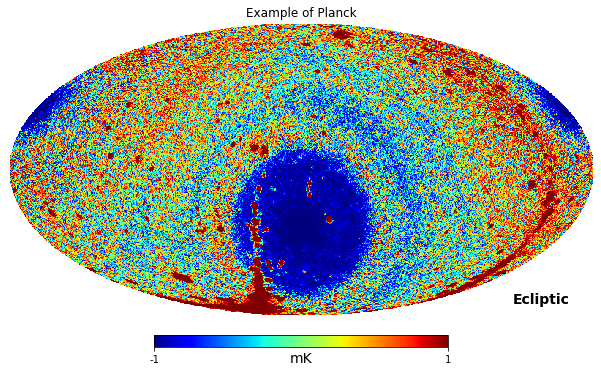

In [ ]:
import healpy as hp
import matplotlib.pyplot as plt 

# read Planck data
# このPlanckのデータはI_Stokes, Q_Stokes, U_Stokesなどの違うデータが入っている
# デフォルトは I_Stokes 違うデータセット指定する場合は指定する(Planckのページを参照)↓
#planck_map = hp.read_map('/content/drive/MyDrive/02_JaxaIntern/HEALpix/LFI_SkyMap_030_1024_R2.01_full.fits', ('Q_Stokes', ))
planck_map = hp.read_map('https://data.darts.isas.jaxa.jp/pub/maxi/products/.gsc/allsky_cex_gsc_ait_160_320_20200425.img')
# readmapで読むと配列１

# make healpix map(銀河座標)
hp.mollview(planck_map, title='Example of Planck', 
            unit='mK', norm='hist', min=-1, max=1)

# coordオプションを赤道座標にする
hp.mollview(planck_map, coord=['G','E'], title='Example of Planck', 
            unit='mK', norm='hist', min=-1, max=1)


# カラーマップの変更
hp.mollview(planck_map, cmap='jet', coord=['G','E'], 
            title='Example of Planck', unit='mK', norm='hist', min=-1, max=1)

# Draw
plt.show()

In [ ]:
planck_map.shape


(196608,)

healpyは観測結果を球面調和関数で展開することができる

球面調和関数とは？

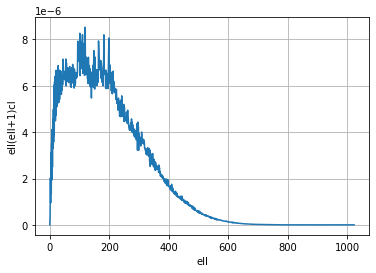

In [ ]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt 


# read Planck data
planck_map = hp.read_map('/content/drive/MyDrive/02_JaxaIntern/HEALpix/LFI_SkyMap_030_1024_R2.01_full.fits')

# Spherical harmonic transforms
LMAX = 1024
cl = hp.anafast(planck_map, lmax=LMAX)

# set ell list
ell = np.arange(len(cl))

# plot spectrum
plt.plot(ell, ell*(ell+1)*cl)
plt.xlabel('ell')
plt.ylabel('ell(ell+1)cl')
plt.grid()
plt.show()

.csvファイルの読み込み（使用するか不明のためスキップ）


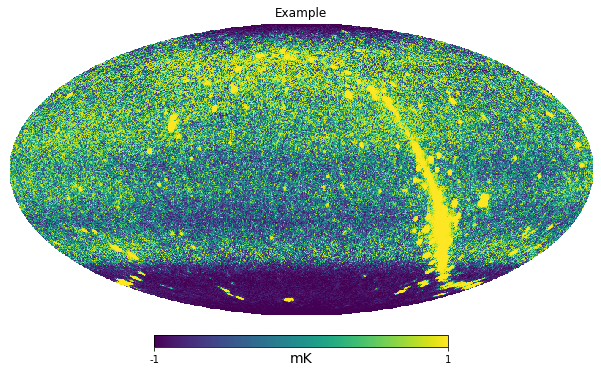

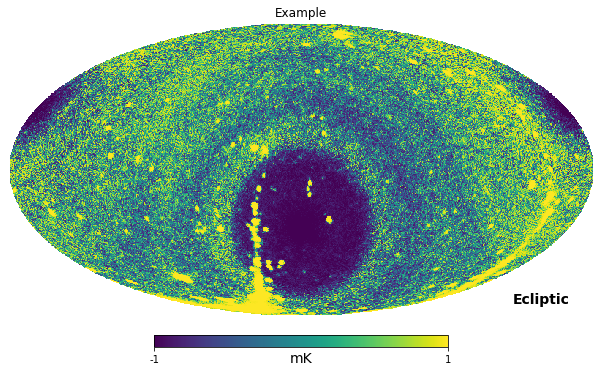

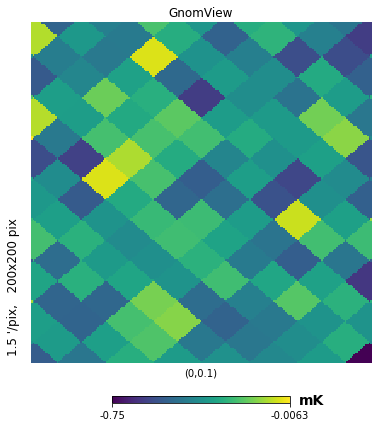

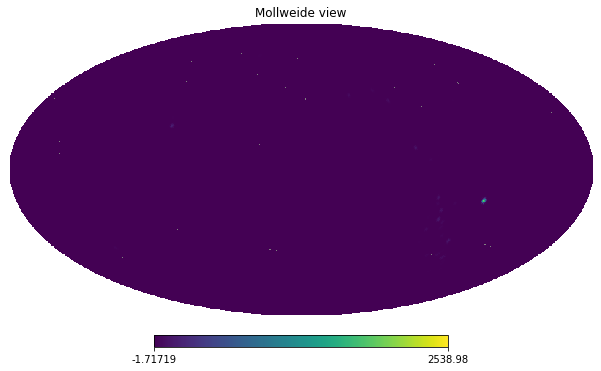

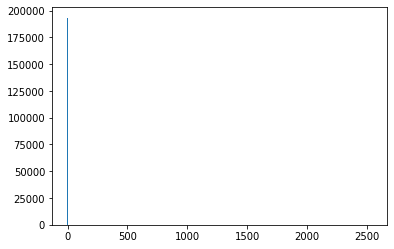

In [ ]:
import healpy as hp
import matplotlib.pyplot as plt 

# read Planck data
allsky_maxi = hp.read_map('/content/drive/MyDrive/02_JaxaIntern/HEALpix/allsky_cex_gsc_ait_160_320_20200425.img')
#hp.write_map("my_map.fits", moc, overwrite=True)

# make healpix map
hp.mollview(allsky_maxi,
            title='Example',
            unit='mK', 
            norm='hist',
            min=-1, 
            max=1)
plt.show()
hp.mollview(allsky_maxi,
            coord=['G','E'],
            title='Example',
            unit='mK', 
            norm='hist',
            min=-1, 
            max=1)
plt.show()
#gnomviewはノモニック投影を提供
hp.gnomview(allsky_maxi, rot=[0, 0.1], title="GnomView", unit="mK", format="%.2g")
plt.show()
#mask?
mask = hp.read_map("/content/drive/MyDrive/02_JaxaIntern/HEALpix/allsky_cex_gsc_ait_320_400_20200425.img").astype(np.bool_)
wmap_map_I_masked = hp.ma(allsky_maxi)
wmap_map_I_masked.mask = np.logical_not(mask)
hp.mollview(wmap_map_I_masked.filled())
plt.show()
plt.hist(wmap_map_I_masked.compressed(), bins=1000);

# Draw#
plt.show()

astropyを用いた解析

In [ ]:
pip install astropy-healpix

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                    4 / length of dimension 1                          
NAXIS2  =               196608 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    1 / number of table fields                         
TTYPE1  = 'CNTS    '                                                            
TFORM1  = '1E      '                                                            
EXTNAME = 'HPXIMG  '                                                            
NSIDE   =                  128                                                  
PIXTYPE = 'HEALPIX '        

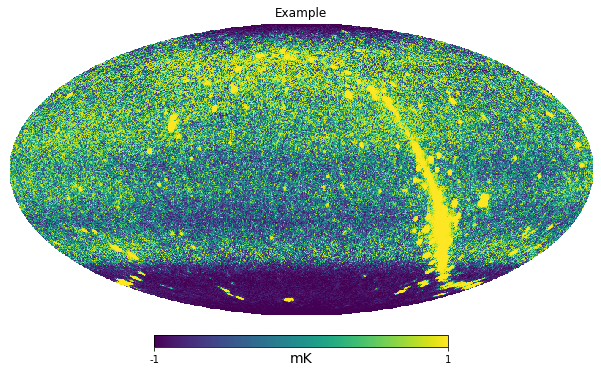

In [ ]:
import astropy.io.fits
from astropy_healpix import HEALPix
from astropy.coordinates import Galactic
from astropy.coordinates import SkyCoord
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt 

fits = astropy.io.fits.open('https://data.darts.isas.jaxa.jp/pub/maxi/products/.gsc/allsky_cex_gsc_ait_160_320_20200425.img')
# Fitsの0番目は二次元
hdu = fits[1]
header = hdu.header
data = hdu.data

# ヘッダ情報を確認
print(repr(header))

naxis = header['NAXIS']   # 辞書のように扱える
naxis1 = header.get('NAXIS1')

# データ構造を確認
type(data)


wmap_map_I = hp.read_map("https://data.darts.isas.jaxa.jp/pub/maxi/products/.gsc/allsky_cex_gsc_ait_160_320_20200425.img",hdu=1,nest=False)

hp.mollview(wmap_map_I,
            title='Example',
            unit='mK', 
            norm='hist',
            nest=False, 
            min=-1, 
            max=1)



In [ ]:
wmap_map_I.shape

(196608,)

In [ ]:
fits[0].data.shape

(2000, 4000)

In [ ]:
fits[1].data.shape

(196608,)

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                    4 / length of dimension 1                          
NAXIS2  =               196608 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    1 / number of table fields                         
TTYPE1  = 'CNTS    '                                                            
TFORM1  = '1E      '                                                            
EXTNAME = 'HPXIMG  '                                                            
NSIDE   =                  128                                                  
PIXTYPE = 'HEALPIX '        

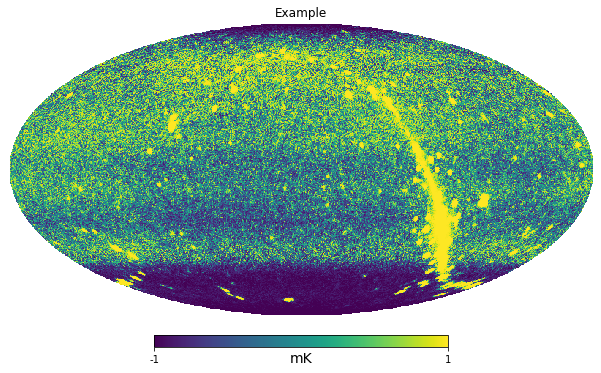

In [ ]:
fits = astropy.io.fits.open('https://data.darts.isas.jaxa.jp/pub/maxi/products/.gsc/allsky_cex_gsc_ait_160_320_20200425.img')
# Fitsの0番目は二次元
hdu = fits[1]
header = hdu.header
data = hdu.data

# ヘッダ情報を確認
print(repr(header))

naxis = header['NAXIS']   # 辞書のように扱える
naxis1 = header.get('NAXIS1')

# データ構造を確認
type(data)


wmap_map_I = hp.read_map("https://data.darts.isas.jaxa.jp/pub/maxi/products/.gsc/allsky_cex_gsc_ait_160_320_20200425.img",hdu=1,nest=False)

hp.mollview(wmap_map_I_masked,
            title='Example',
            unit='mK', 
            norm='hist',
            nest=False, 
            min=-1, 
            max=1)